In [1]:
import rescomp as rc
import scipy as sp
import numpy as np
from scipy.interpolate import CubicSpline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]

# Evolution of Reservoir Fixed Points with Time

This notebook will investigate the following ideas:
* Plot the movement of the fixed points along with the orbit of the reservoir nodes
    - Use a training signal that is easy to understand
    - Show the effect of different kinds of readin matrixes on the movement of fixed points
    - Measure the effectiveness of the different readins on linear independence of the signals
    - Show a link between linear independence and learning ability
    - We want to know the derivative of the fixed point.

In [2]:
LORENZPRMS = {
    "res_sz" : 3,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}

rcomp = rc.ResComp(**LORENZPRMS, sparse_res=False)

In [10]:
t, U = rc.orbit("lorenz", duration=5, trim=True)
u = CubicSpline(t, U)
rstar = []
r0 = np.ones(LORENZPRMS["res_sz"])
r0 = np.random.rand(LORENZPRMS["res_sz"])
for ti in t:
    F = lambda r: rcomp.res_f(ti, r, u)
    fp = sp.optimize.fsolve(F, r0)
    rstar.append(fp)
    r0 = fp
rstar = np.vstack(tuple(rstar))

In [38]:
Udrive = rcomp.internal_state_response(t, U, rstar[0])

## Sigmoid (3 Nodes)

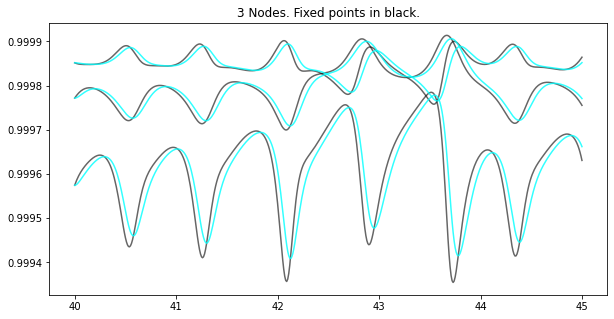

In [39]:
N = 0
plt.plot(t[N:], rstar[N:,:], 'k', alpha=0.6)
plt.plot(t[N:], Udrive[N:,:], 'cyan', alpha=0.8)
plt.title("3 Nodes. Fixed points in black.")
plt.show()

In [6]:
LORENZPRMS2 = {
    "res_sz" : 10,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}

rcomp = rc.ResComp(**LORENZPRMS2, sparse_res=False)

In [7]:
t, U = rc.orbit("lorenz", duration=20, trim=True)
u = CubicSpline(t, U)
rstar = []
r0 = np.ones(LORENZPRMS2["res_sz"])
for ti in t:
    F = lambda r: rcomp.res_f(ti, r, u)
    fp = sp.optimize.fsolve(F, r0)
    rstar.append(fp)
    r0 = fp
rstar = np.vstack(tuple(rstar))

In [8]:
Udrive = rcomp.internal_state_response(t, U, rstar[0])

## Sigmoid (10 Nodes)

In [2]:
plt.plot(t, rstar, 'k', alpha=0.6)
plt.plot(t, Udrive, 'cyan', alpha=0.8)
plt.title("10 Nodes. Fixed points in black.")

plt.show()

NameError: name 't' is not defined

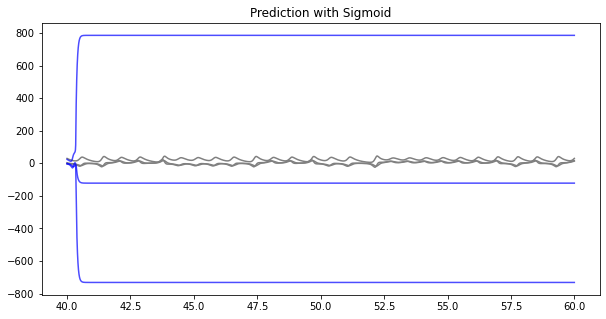

Error:  3.3044275008927406


In [10]:
rcomp.train(t, U)
pre = rcomp.predict(t, U[0])
plt.plot(t, U, c='gray')
plt.plot(t, pre, c="blue", alpha=0.7)
plt.title("Prediction with Sigmoid")
plt.show()
print("Error: ", rc.system_fit_error(t, pre, "lorenz", order=2))

In [11]:
LORENZPRMS3 = {
    "res_sz" : 10,
    "activ_f" : np.sin,
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 1.5
}

rcomp = rc.ResComp(**LORENZPRMS3, sparse_res=False)

In [12]:
t, U = rc.orbit("lorenz", duration=5, trim=True)
u = CubicSpline(t, U)
rstar = []
r0 = np.zeros(LORENZPRMS3["res_sz"])
for ti in t:
    F = lambda r: rcomp.res_f(ti, r, u)
    fp = sp.optimize.fsolve(F, r0)
    rstar.append(fp)
    r0 = fp
rstar = np.vstack(tuple(rstar))

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [13]:
Udrive = rcomp.internal_state_response(t, U, rstar[0])

## Sin(x) (10 Nodes)

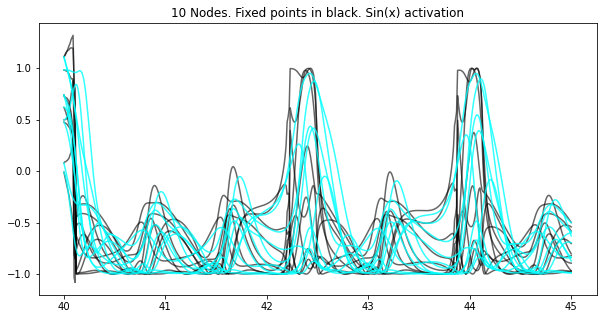

In [14]:
plt.plot(t, rstar, 'k', alpha=0.6)
plt.plot(t, Udrive, 'cyan', alpha=0.8)
plt.title("10 Nodes. Fixed points in black. Sin(x) activation")

plt.show()

## Sin(x) prediction

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


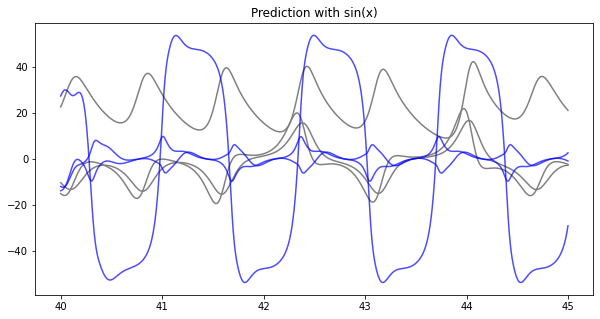

20.365379078262908


In [15]:
rcomp.train(t, U)
pre = rcomp.predict(t, U[0])
plt.plot(t, U, c='gray')
plt.plot(t, pre, c="blue", alpha=0.7)
plt.title("Prediction with sin(x)")
plt.show()
print(rc.system_fit_error(t, pre, "lorenz", order=2))

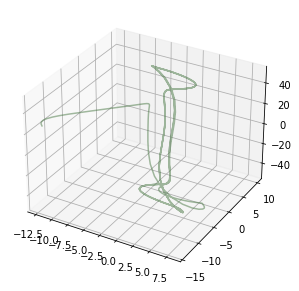

array([0.28349706, 0.46502113, 0.26161802])

In [16]:
rc.plot3d(pre)

## Sigmoid (30 Nodes)

In [25]:
LORENZPRMS4 = {
    "res_sz" : 50,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}

rcomp = rc.ResComp(**LORENZPRMS4, sparse_res=False)

In [26]:
t, U = rc.orbit("lorenz", duration=20, trim=True)
u = CubicSpline(t, U)
rstar = []
r0 = np.ones(LORENZPRMS4["res_sz"])
for ti in t:
    F = lambda r: rcomp.res_f(ti, r, u)
    fp = sp.optimize.fsolve(F, r0)
    rstar.append(fp)
    r0 = fp
rstar = np.vstack(tuple(rstar))

In [27]:
Udrive = rcomp.internal_state_response(t, U, rstar[0])

## Sigmoid (20 Nodes)

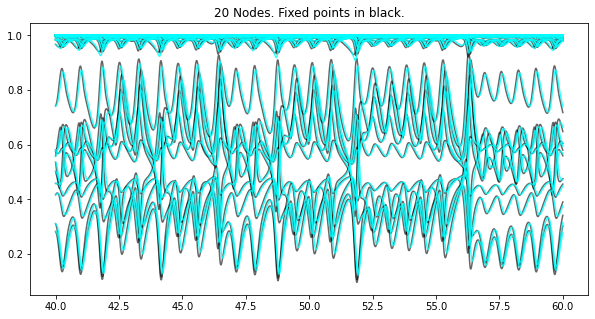

In [28]:
plt.plot(t, rstar, 'k', alpha=0.6)
plt.plot(t, Udrive, 'cyan', alpha=0.8)
plt.title("20 Nodes. Fixed points in black.")

plt.show()

## Sigmoid prediction

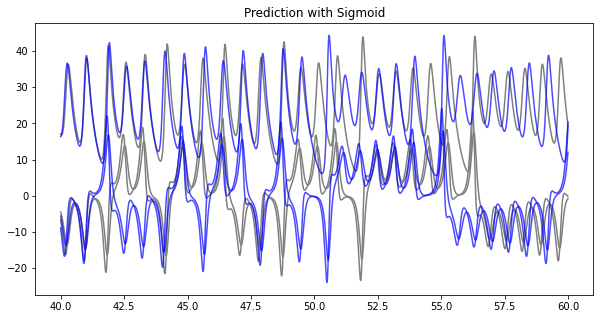

Error:  21.541736183200566


In [29]:
rcomp.train(t, U)
pre = rcomp.predict(t, U[0])
plt.plot(t, U, c='gray')
plt.plot(t, pre, c="blue", alpha=0.7)
plt.title("Prediction with Sigmoid")
plt.show()
print("Error: ", rc.system_fit_error(t, pre, "lorenz", order=2))

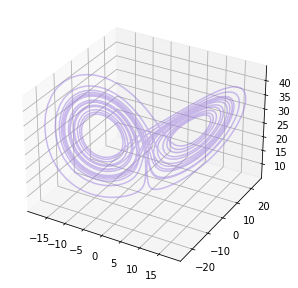

array([0.61098354, 0.49515204, 0.87760495])

In [30]:
rc.plot3d(pre)

## Hypothesis: 
Linear independence does not make for better learning